In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import loadtxt
from random import *
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import ADASYN
%matplotlib inline
import plotly.plotly as py
#import cufflinks as cf
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [86]:
#KM Plots
ClinicalDF = pd.read_csv('all_clinical.txt', sep='\t')

In [87]:
ClinicalDF.head()

,Unnamed: 0,CASE_ID,AGE,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_NODES_PATHOLOGIC_PN,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,AJCC_TUMOR_PATHOLOGIC_PT,BRACHYTHERAPY_TOTAL_DOSE_POINT_A,CANCER_TYPE,...,STAGING_SYSTEM,STAGING_SYSTEM_OTHER,SURGERY_FOR_POSITIVE_MARGINS,SURGERY_FOR_POSITIVE_MARGINS_OTHER,SURGICAL_PROCEDURE_FIRST,TISSUE_SOURCE_SITE,TUMOR_STATUS,TUMOR_TISSUE_SITE,VIAL_NUMBER,VITAL_STATUS
0,0,TCGA-A7-A3J0,62.0,M0,N0,Stage IIA,7th,T2,NaN,Breast Cancer,...,Sentinel node biopsy alone,NaN,NaN,NaN,Lumpectomy,A7,TUMOR FREE,Breast,A,Alive
1,1,TCGA-OL-A66N,59.0,MX,N3,Stage IIIC,7th,T3,NaN,Breast Cancer,...,Sentinel node biopsy alone,NaN,NaN,NaN,Modified Radical Mastectomy,OL,TUMOR FREE,Breast,A,Alive
2,2,TCGA-AQ-A0Y5,70.0,MX,N2a,Stage IIIA,7th,T2,NaN,Breast Cancer,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Modified Radical Mastectomy,AQ,TUMOR FREE,Breast,A,Dead
3,3,TCGA-E9-A22H,42.0,M0,N1,Stage IIB,7th,T2,NaN,Breast Cancer,...,Axillary lymph node dissection alone,NaN,NaN,NaN,Modified Radical Mastectomy,E9,TUMOR FREE,Breast,A,Alive
4,4,TCGA-BH-A0EB,69.0,M0,N0 (i-),Stage IA,NaN,T1c,H-SCORE 300,Breast Cancer,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Other,BH,TUMOR FREE,Breast,A,Alive


In [88]:
ClinicalDF.dropna(subset=['AJCC_PATHOLOGIC_TUMOR_STAGE'], inplace=True)

In [89]:
ClinicalDF.head()

,Unnamed: 0,CASE_ID,AGE,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_NODES_PATHOLOGIC_PN,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,AJCC_TUMOR_PATHOLOGIC_PT,BRACHYTHERAPY_TOTAL_DOSE_POINT_A,CANCER_TYPE,...,STAGING_SYSTEM,STAGING_SYSTEM_OTHER,SURGERY_FOR_POSITIVE_MARGINS,SURGERY_FOR_POSITIVE_MARGINS_OTHER,SURGICAL_PROCEDURE_FIRST,TISSUE_SOURCE_SITE,TUMOR_STATUS,TUMOR_TISSUE_SITE,VIAL_NUMBER,VITAL_STATUS
0,0,TCGA-A7-A3J0,62.0,M0,N0,Stage IIA,7th,T2,NaN,Breast Cancer,...,Sentinel node biopsy alone,NaN,NaN,NaN,Lumpectomy,A7,TUMOR FREE,Breast,A,Alive
1,1,TCGA-OL-A66N,59.0,MX,N3,Stage IIIC,7th,T3,NaN,Breast Cancer,...,Sentinel node biopsy alone,NaN,NaN,NaN,Modified Radical Mastectomy,OL,TUMOR FREE,Breast,A,Alive
2,2,TCGA-AQ-A0Y5,70.0,MX,N2a,Stage IIIA,7th,T2,NaN,Breast Cancer,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Modified Radical Mastectomy,AQ,TUMOR FREE,Breast,A,Dead
3,3,TCGA-E9-A22H,42.0,M0,N1,Stage IIB,7th,T2,NaN,Breast Cancer,...,Axillary lymph node dissection alone,NaN,NaN,NaN,Modified Radical Mastectomy,E9,TUMOR FREE,Breast,A,Alive
4,4,TCGA-BH-A0EB,69.0,M0,N0 (i-),Stage IA,NaN,T1c,H-SCORE 300,Breast Cancer,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Other,BH,TUMOR FREE,Breast,A,Alive


In [90]:
#Commented out
#CibersortDF = pd.read_csv('CIBERSORT.Output_Job30.csv', sep=',')
#CibersortDF = CibersortDF.rename(index=str, columns={"Input Sample": "CASE_ID"})
#joined_df = ClinicalDF.merge(CibersortDF, on='CASE_ID', how='inner')
#ClinicalDF = joined_df.loc[:,'CASE_ID':'VITAL_STATUS']

In [91]:
reqDF = ClinicalDF[['CASE_ID','AJCC_PATHOLOGIC_TUMOR_STAGE','DAYS_TO_DEATH','VITAL_STATUS']]

In [92]:
reqDF.head()

,CASE_ID,AJCC_PATHOLOGIC_TUMOR_STAGE,DAYS_TO_DEATH,VITAL_STATUS
0,TCGA-A7-A3J0,Stage IIA,NaN,Alive
1,TCGA-OL-A66N,Stage IIIC,NaN,Alive
2,TCGA-AQ-A0Y5,Stage IIIA,172.0,Dead
3,TCGA-E9-A22H,Stage IIB,NaN,Alive
4,TCGA-BH-A0EB,Stage IA,NaN,Alive


In [93]:
reqDF.dropna(subset=['DAYS_TO_DEATH'], inplace=True)

/Users/rahulbhansali1/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [94]:
reqDF.head()

,CASE_ID,AJCC_PATHOLOGIC_TUMOR_STAGE,DAYS_TO_DEATH,VITAL_STATUS
2,TCGA-AQ-A0Y5,Stage IIIA,172.0,Dead
21,TCGA-BH-A203,Stage IIB,1174.0,Dead
23,TCGA-B6-A0I6,Stage IIA,991.0,Dead
32,TCGA-AR-A0U2,Stage IIIA,2551.0,Dead
44,TCGA-BH-A1EO,Stage IIA,2798.0,Dead


In [95]:
mapping = {'Stage I': 1, 'Stage IA': 1, 'Stage IB': 1, 'Stage II': 2, 'Stage IIA':2, 'Stage IIB':2, 'Stage III':3, 'Stage IIIA':3, 'Stage IIIB':3, 'Stage IIIC':3,'Stage IV':3,  'Stage X':3}

In [96]:
reqDF = reqDF.replace({'AJCC_PATHOLOGIC_TUMOR_STAGE': mapping})

In [97]:
reqDF.head()

,CASE_ID,AJCC_PATHOLOGIC_TUMOR_STAGE,DAYS_TO_DEATH,VITAL_STATUS
2,TCGA-AQ-A0Y5,3,172.0,Dead
21,TCGA-BH-A203,2,1174.0,Dead
23,TCGA-B6-A0I6,2,991.0,Dead
32,TCGA-AR-A0U2,3,2551.0,Dead
44,TCGA-BH-A1EO,2,2798.0,Dead


In [98]:
vitalStatus_mapping = {'Alive': 0, 'Dead': 1}

In [99]:
reqDF = reqDF.replace({'VITAL_STATUS': vitalStatus_mapping})

In [100]:
reqDF.head()

,CASE_ID,AJCC_PATHOLOGIC_TUMOR_STAGE,DAYS_TO_DEATH,VITAL_STATUS
2,TCGA-AQ-A0Y5,3,172.0,1
21,TCGA-BH-A203,2,1174.0,1
23,TCGA-B6-A0I6,2,991.0,1
32,TCGA-AR-A0U2,3,2551.0,1
44,TCGA-BH-A1EO,2,2798.0,1


In [101]:
kmf = KaplanMeierFitter()

In [102]:
T = reqDF["DAYS_TO_DEATH"]
E = reqDF["VITAL_STATUS"]

kmf.fit(T, event_observed=E,
                      timeline=None, entry=None, label='KM_estimate',
                      alpha=None, left_censorship=False, ci_labels=None)


#kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 105 observations, 0 censored>

In [103]:
#b=df.iloc[:,1:].values

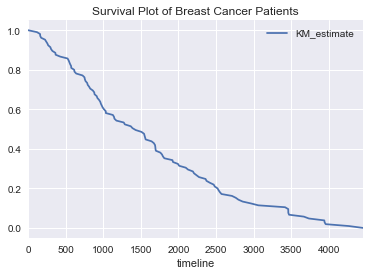

In [104]:
kmf.survival_function_.plot()
plt.title('Survival Plot of Breast Cancer Patients');

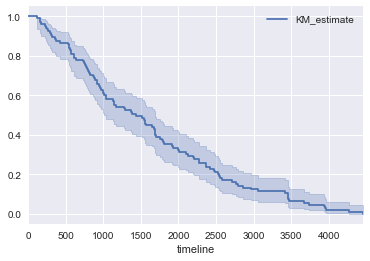

In [105]:
kmf.plot()

Median survival time of Stage 1 Cancer Cluster: 1812.0
Median survival time of Stage 2 Cancer Cluster: 1694.0
Median survival time of Stage 3 Cancer Cluster: 825.0


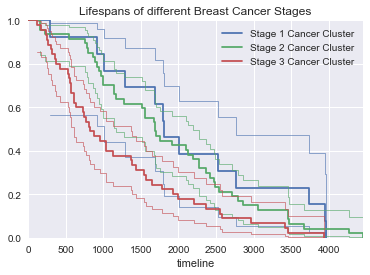

In [84]:
ax = plt.subplot(111)

dem1 = (reqDF["AJCC_PATHOLOGIC_TUMOR_STAGE"] == 1)
kmf.fit(T[dem1], event_observed=E[dem1], label="Stage 1 Cancer Cluster")
kmf.plot(ax=ax, ci_force_lines=True)
print("Median survival time of Stage 1 Cancer Cluster:", kmf.median_)


dem2 = (reqDF["AJCC_PATHOLOGIC_TUMOR_STAGE"] == 2)
kmf.fit(T[dem2], event_observed=E[dem2], label="Stage 2 Cancer Cluster")
kmf.plot(ax=ax, ci_force_lines=True)
print("Median survival time of Stage 2 Cancer Cluster:", kmf.median_)

dem3 = (reqDF["AJCC_PATHOLOGIC_TUMOR_STAGE"] == 3)
kmf.fit(T[dem3], event_observed=E[dem3], label="Stage 3 Cancer Cluster")
kmf.plot(ax=ax, ci_force_lines=True)
print("Median survival time of Stage 3 Cancer Cluster:", kmf.median_)

plt.ylim(0, 1);
plt.title("Lifespans of different Breast Cancer Stages");

In [111]:
results = logrank_test(T[dem1], T[dem2], E[dem1], E[dem2], alpha=.99)

results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p   
        0.5986 0.4391
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [112]:
results = logrank_test(T[dem2], T[dem3], E[dem2], E[dem3], alpha=.99)

results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        7.9418 0.0048  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [113]:
results = logrank_test(T[dem3], T[dem1], E[dem3], E[dem1], alpha=.99)

results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        6.6978 0.0097  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [118]:
reqDF.head()

,CASE_ID,AJCC_PATHOLOGIC_TUMOR_STAGE,DAYS_TO_DEATH,VITAL_STATUS
2,TCGA-AQ-A0Y5,3,172.0,1
21,TCGA-BH-A203,2,1174.0,1
23,TCGA-B6-A0I6,2,991.0,1
32,TCGA-AR-A0U2,3,2551.0,1
44,TCGA-BH-A1EO,2,2798.0,1


Median survival time of Stage 1 Cancer Cluster: 1812.0
Median survival time of Stage 2 Cancer Cluster: 1694.0


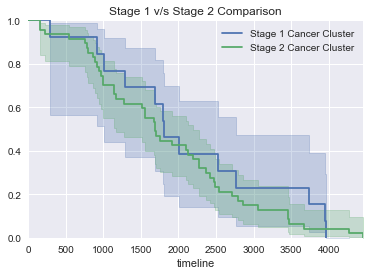

In [122]:
ax = plt.subplot(111)

dem1 = (reqDF["AJCC_PATHOLOGIC_TUMOR_STAGE"] == 1)
kmf.fit(T[dem1], event_observed=E[dem1], label="Stage 1 Cancer Cluster")
kmf.plot(ax=ax, ci_force_lines=False)
print("Median survival time of Stage 1 Cancer Cluster:", kmf.median_)


dem2 = (reqDF["AJCC_PATHOLOGIC_TUMOR_STAGE"] == 2)
kmf.fit(T[dem2], event_observed=E[dem2], label="Stage 2 Cancer Cluster")
kmf.plot(ax=ax, ci_force_lines=False)
print("Median survival time of Stage 2 Cancer Cluster:", kmf.median_)

plt.ylim(0, 1);
plt.title("Stage 1 v/s Stage 2 Comparison");

Median survival time of Stage 2 Cancer Cluster: 1694.0
Median survival time of Stage 3 Cancer Cluster: 825.0


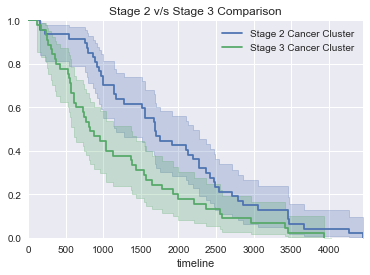

In [124]:
ax = plt.subplot(111)

dem1 = (reqDF["AJCC_PATHOLOGIC_TUMOR_STAGE"] == 2)
kmf.fit(T[dem1], event_observed=E[dem1], label="Stage 2 Cancer Cluster")
kmf.plot(ax=ax, ci_force_lines=False)
print("Median survival time of Stage 2 Cancer Cluster:", kmf.median_)


dem2 = (reqDF["AJCC_PATHOLOGIC_TUMOR_STAGE"] == 3)
kmf.fit(T[dem2], event_observed=E[dem2], label="Stage 3 Cancer Cluster")
kmf.plot(ax=ax, ci_force_lines=False)
print("Median survival time of Stage 3 Cancer Cluster:", kmf.median_)

plt.ylim(0, 1);
plt.title("Stage 2 v/s Stage 3 Comparison");

In [ ]:
ax = plt.subplot(111)

dem1 = (reqDF["AJCC_PATHOLOGIC_TUMOR_STAGE"] == 3)
kmf.fit(T[dem1], event_observed=E[dem1], label="Stage 2 Cancer Cluster")
kmf.plot(ax=ax, ci_force_lines=False)
print("Median survival time of Stage 2 Cancer Cluster:", kmf.median_)


dem2 = (reqDF["AJCC_PATHOLOGIC_TUMOR_STAGE"] == 1)
kmf.fit(T[dem2], event_observed=E[dem2], label="Stage 3 Cancer Cluster")
kmf.plot(ax=ax, ci_force_lines=False)
print("Median survival time of Stage 3 Cancer Cluster:", kmf.median_)

plt.ylim(0, 1);
plt.title("Stage 2 v/s Stage 3 Comparison");